In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-19 09:45:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.4MB/s    in 26s     

2023-06-19 09:46:02 (19.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
!unzip 10_food_classes_all_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/554363.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._554363.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2100953.jpg  
  inf

In [ ]:
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import random
import matplotlib.image as mpimg

In [ ]:
generator = ImageDataGenerator(rescale=1./255,
                               width_shift_range=0.2,
                               height_shift_range=0.3,
                               zoom_range=0.2,
                               vertical_flip=True,
                               shear_range=0.2,
                               )

In [ ]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [ ]:
classes = None
for path, dirs, files in os.walk(train_dir):
  if dirs:
    classes = dirs

In [ ]:
classes

['chicken_curry',
 'ice_cream',
 'sushi',
 'hamburger',
 'fried_rice',
 'chicken_wings',
 'steak',
 'grilled_salmon',
 'ramen',
 'pizza']

In [ ]:
def show_random_image(class_name, dir_name):
  if class_name in classes:
    if dir_name == 'train':
      directory = train_dir + '/' + class_name
      files = os.listdir(directory)
      image_name = random.choice(files)
      image = os.path.join(directory, image_name)
      image = tf.io.read_file(image)
      image = tf.image.decode_image(image)
      plt.figure(figsize=(3,3))
      plt.title(class_name)
      plt.imshow(image)
      plt.axis("off")

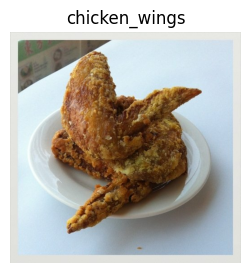

In [ ]:
show_random_image(classes[random.randint(0, len(classes))], 'train')

In [ ]:
train_images = generator.flow_from_directory(directory=train_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             seed=42,
                                             batch_size=32,
                                             shuffle=True)
test_images = generator.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             seed=42,
                                             batch_size=32,
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
A = train_images.next()
A[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
items = os.listdir(test_dir)
classes = sorted([item for item in items if os.path.isdir(os.path.join(test_dir, item))])


TypeError: ignored

In [ ]:
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(len(classes), 'softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_images,
                        steps_per_epoch=len(train_images),
                        validation_data=test_images,
                        validation_steps=int(0.25*len(test_images)),
                        epochs=5)

Epoch 1/5
235/235 [==============================] - 129s 539ms/step - loss: 2.2261 - accuracy: 0.1744 - val_loss: 2.1720 - val_accuracy: 0.2122
Epoch 2/5
235/235 [==============================] - 126s 537ms/step - loss: 2.1405 - accuracy: 0.2325 - val_loss: 2.0965 - val_accuracy: 0.2352
Epoch 3/5
235/235 [==============================] - 125s 534ms/step - loss: 2.0796 - accuracy: 0.2613 - val_loss: 2.0229 - val_accuracy: 0.2845
Epoch 4/5
235/235 [==============================] - 126s 535ms/step - loss: 2.0366 - accuracy: 0.2787 - val_loss: 1.9368 - val_accuracy: 0.3174
Epoch 5/5
235/235 [==============================] - 125s 531ms/step - loss: 1.9925 - accuracy: 0.3020 - val_loss: 1.9225 - val_accuracy: 0.3191


In [ ]:
hist_1 = history_1.history

In [ ]:
epochs = range(len(hist_1["loss"]))

In [ ]:
def plot_loss_curves(history):
  val_loss = history["val_loss"]
  train_loss = history["loss"]

  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.legend()
  plt.show()

def plot_accuracy_curves(history):
  val_acc = history["val_accuracy"]
  train_acc = history["accuracy"]

  plt.plot(epochs, train_acc, label="train_accuracy")
  plt.plot(epochs, val_acc, label="validation_accuracy")
  plt.legend()
  plt.show()

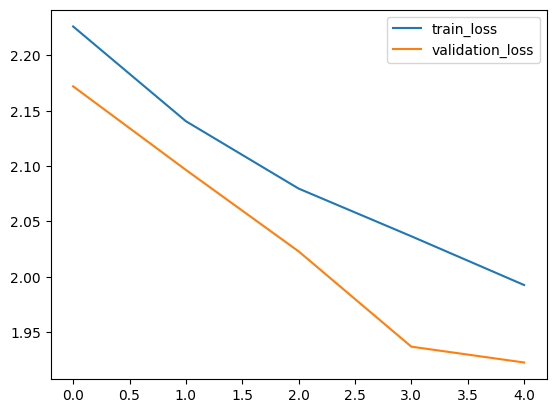

In [ ]:
plot_loss_curves(hist_1)

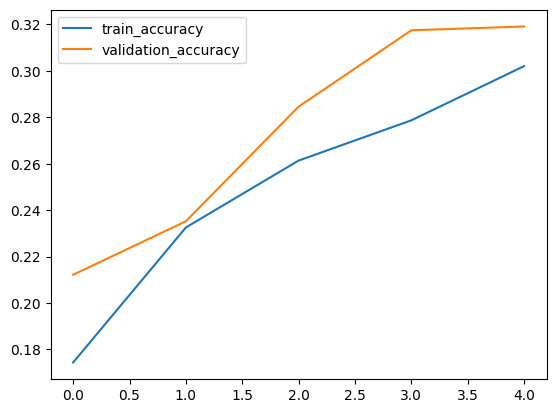

In [ ]:
plot_accuracy_curves(hist_1)

In [ ]:
model_1.evaluate(test_images)

79/79 [==============================] - 37s 463ms/step - loss: 1.9642 - accuracy: 0.3032


[1.964249610900879, 0.30320000648498535]

In [ ]:
!wget http://images.huffingtonpost.com/2015-05-31-1433051788-945248-Thaicoconut.JPG

In [ ]:
def preprocess_img(img):
  image = tf.io.read_file(img)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image, size=[224, 224])
  image = image/255.
  image = tf.expand_dims(image, axis=0)
  return image

In [ ]:
import numpy as np

In [ ]:
wings = preprocess_img('/content/image.JPG')
classes[np.argmax(model_1.predict(wings))]

1/1 [==============================] - 0s 30ms/step


'chicken_wings'

In [ ]:
!wget https://www.mlive.com/resizer/V5h1SPLHopOpvP5tbF2BQh8FyCk=/1280x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.mlive.com/home/mlive-media/width2048/img/chronicle/news_impact/photo/cone-picjpg-804aa1accddad0a6.jpg

In [ ]:
icecream = preprocess_img('/content/cone-picjpg-804aa1accddad0a6.jpg')
classes[np.argmax(model_1.predict(icecream))]

1/1 [==============================] - 0s 19ms/step


'ice_cream'

In [ ]:
!wget https://www.foodiecrush.com/wp-content/uploads/2019/05/Grilled-Salmon-foodiecrush.com-023.jpg

--2023-06-19 11:33:03--  https://www.foodiecrush.com/wp-content/uploads/2019/05/Grilled-Salmon-foodiecrush.com-023.jpg
Resolving www.foodiecrush.com (www.foodiecrush.com)... 104.21.31.46, 172.67.174.247, 2606:4700:3037::ac43:aef7, ...
Connecting to www.foodiecrush.com (www.foodiecrush.com)|104.21.31.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264257 (258K) [image/jpeg]
Saving to: ‘Grilled-Salmon-foodiecrush.com-023.jpg’

Grilled-Salmon-food 100%[===================>] 258.06K  --.-KB/s    in 0.006s  

2023-06-19 11:33:03 (45.1 MB/s) - ‘Grilled-Salmon-foodiecrush.com-023.jpg’ saved [264257/264257]



In [ ]:
salmon = preprocess_img('/content/Grilled-Salmon-foodiecrush.com-023.jpg')
classes[np.argmax(model_1.predict(salmon))]

1/1 [==============================] - 0s 100ms/step


'steak'